In [1]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import fft
import math
import  cv2
from moviepy.editor import *
import moviepy.editor as mpe


fs, song = read('SilentKnight.wav') # data reading
channel1 = song[:,1]
channel1 = channel1/max(abs(channel1))


In [16]:
def padder(data,size): # helper function to pad the windows 
    new = np.zeros(int(size))
    new[0:len(data)]= data 
    return new 
    
fps= 10 #hyperparameters 
c =1

interval_sample = int(fs/fps)
interval_number = math.ceil(len(channel1)/interval_sample)
new_rate = interval_number*interval_sample
padded = padder(channel1,new_rate)

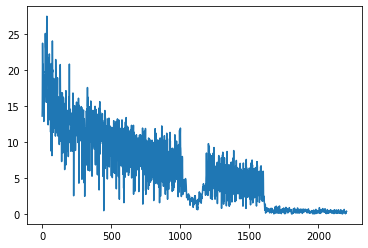

In [17]:
magnitudes = np.zeros((interval_sample,interval_number))
for i in range(magnitudes.shape[1]):    
    magnitudes[:,i]=abs(np.fft.fft(padded[interval_sample*i:interval_sample*(i+1)]))
    
magnitudes= 10*np.log10( magnitudes + c)
freq = np.fft.fftfreq(interval_sample,d= 1/fs)
plt.plot(magnitudes[:interval_sample//2,200])

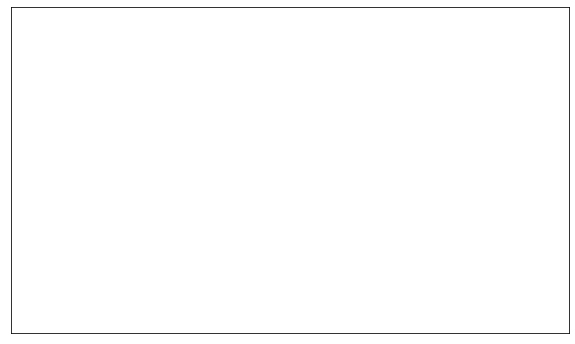

In [14]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize =(10,6))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
imagelist = []

for i in range(interval_number):
    ax.set_ylim([0,40]) 
    ax.plot(magnitudes[:interval_sample//2,i])# change this line if you want two sided plot  ax.plot(freq,magnitudes[:,i])
    plt.savefig("snap.png",format="png")
    ax.clear()
    X = cv2.imread("snap.png")
    X =cv2.cvtColor(X,cv2.COLOR_BGR2RGB)  
    imagelist.append(X)

In [15]:
clip = ImageSequenceClip(imagelist,fps = fps)
clip.write_videofile("part1video.mp4", codec = "mpeg4")


my_clip = mpe.VideoFileClip("part1video.mp4")
audio =  mpe.AudioFileClip("SilentKnight.wav")
final = my_clip.set_audio(audio)
final.write_videofile("total10.mp4")

t:   6%|▌         | 50/823 [00:00<00:01, 485.22it/s, now=None]Moviepy - Building video part1video.mp4.
Moviepy - Writing video part1video.mp4

t: 100%|█████████▉| 820/823 [00:01<00:00, 504.98it/s, now=None]Moviepy - Done !
Moviepy - video ready part1video.mp4
Moviepy - Building video total10_son.mp4.
MoviePy - Writing audio in total10_sonTEMP_MPY_wvf_snd.mp3
t:   6%|▌         | 48/823 [00:00<00:01, 477.71it/s, now=None]MoviePy - Done.
Moviepy - Writing video total10_son.mp4

t:  96%|█████████▋| 794/823 [00:03<00:00, 237.13it/s, now=None]Moviepy - Done !
Moviepy - video ready total10_son.mp4
